In [12]:
import numpy as np
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("Student_Performance.csv")

In [3]:
df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


In [4]:
df.isnull().sum()

Hours Studied                       0
Previous Scores                     0
Extracurricular Activities          0
Sleep Hours                         0
Sample Question Papers Practiced    0
Performance Index                   0
dtype: int64

C:\Users\ranje\AppData\Local\Temp\ipykernel_8428\3728637443.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Performance Index'])


<Axes: xlabel='Performance Index', ylabel='Density'>

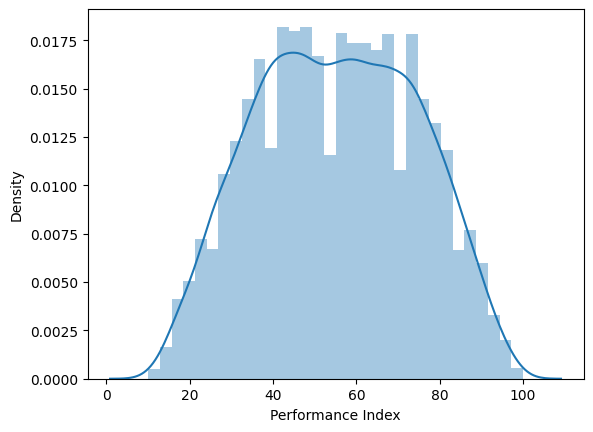

In [9]:
sns.distplot(df['Performance Index'])

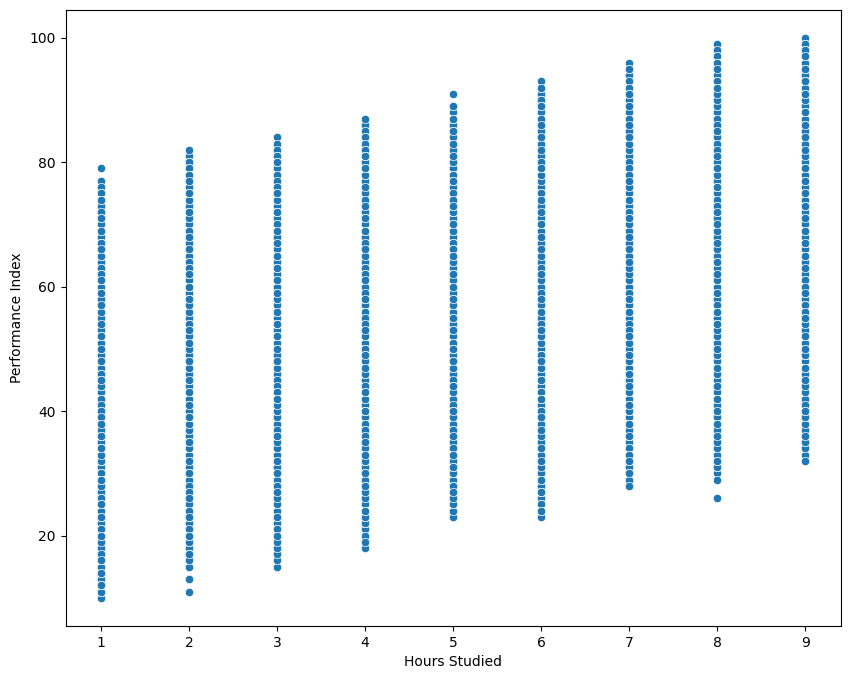

In [20]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.scatterplot(x=df['Hours Studied'],y=df['Performance Index'],ax=ax)
plt.show()

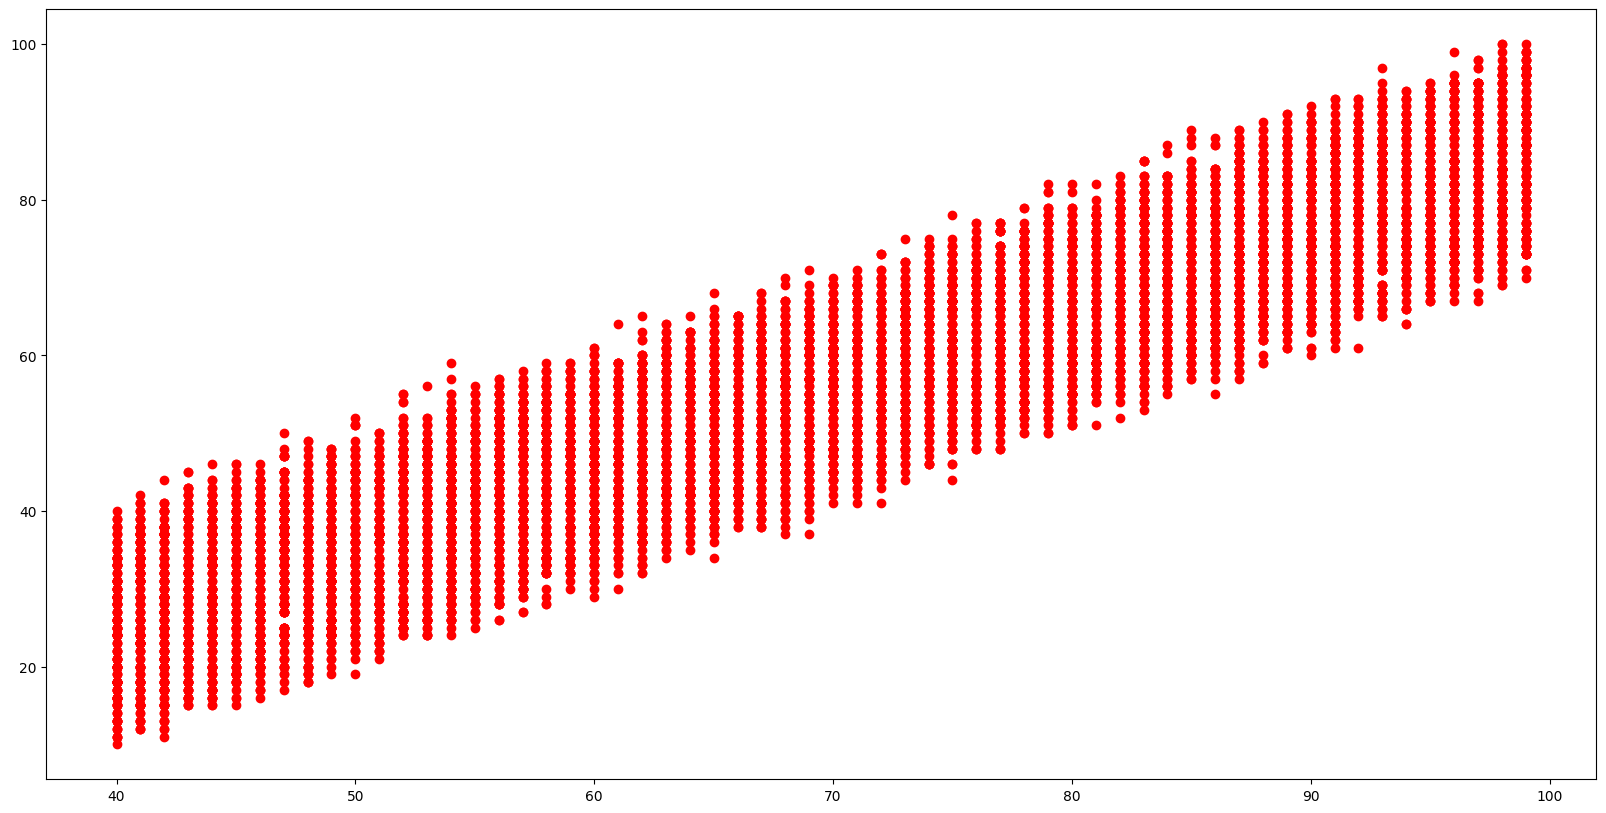

In [16]:
plt.figure(figsize=(20,10))
plt.scatter(df['Previous Scores'],df['Performance Index'],c='red')
plt.show()

<Axes: xlabel='Extracurricular Activities'>

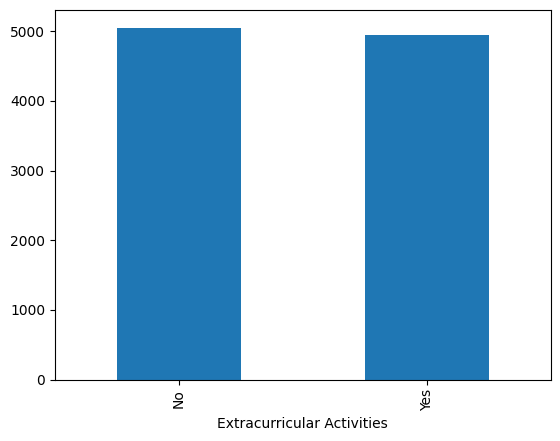

In [7]:
df['Extracurricular Activities'].value_counts().plot(kind='bar')

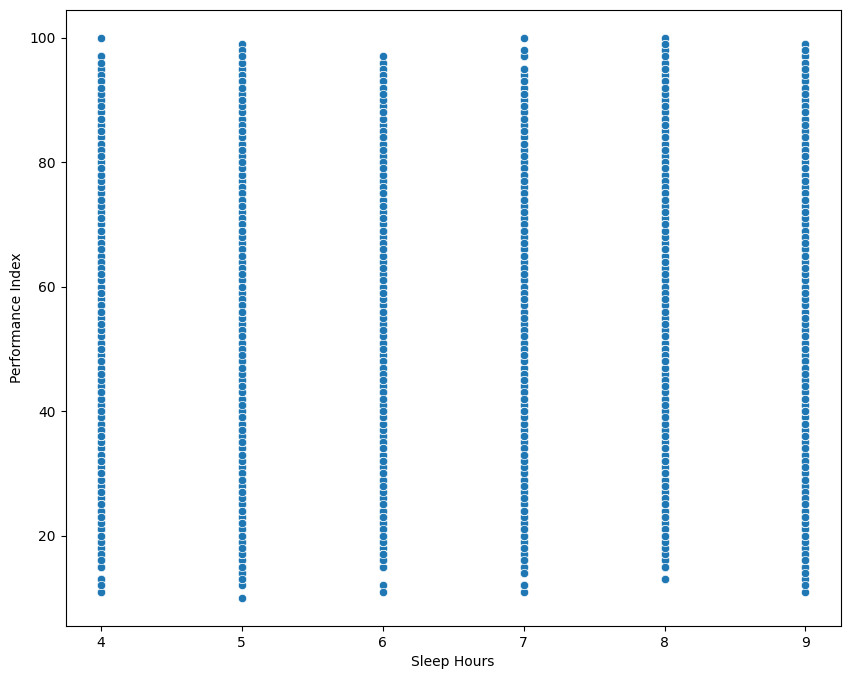

In [21]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.scatterplot(x=df['Sleep Hours'],y=df['Performance Index'],ax=ax)
plt.show()

C:\Users\ranje\AppData\Local\Temp\ipykernel_8428\505395409.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Sample Question Papers Practiced'])


<Axes: xlabel='Sample Question Papers Practiced', ylabel='Density'>

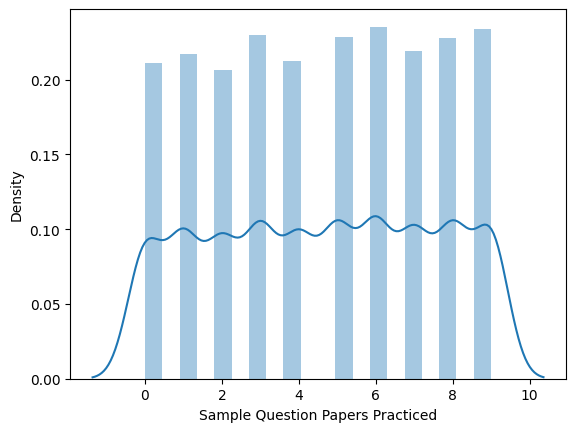

In [22]:
sns.distplot(df['Sample Question Papers Practiced'])

In [23]:
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()

In [24]:
df['Extracurricular Activities']=lb.fit_transform(df['Extracurricular Activities'])

<Axes: >

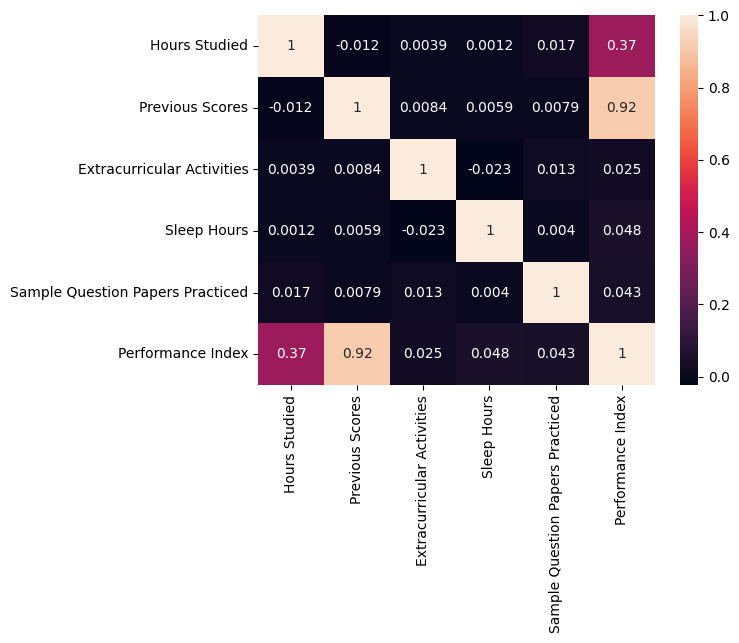

In [29]:
sns.heatmap(df.corr(),annot=True)

In [33]:
x=df.iloc[:,:-1]

In [34]:
y=df.iloc[:,-1]
y.shape

(10000,)

In [35]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.25,random_state=1)

In [36]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score,mean_absolute_error

In [37]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor,ExtraTreesRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor

## Multiple linear Regression

In [42]:
lr=LinearRegression()
lr.fit(xtrain,ytrain)
y_pred=lr.predict(xtest)
print('R2 score',r2_score(ytest,y_pred))
print('MAE',mean_absolute_error(ytest,y_pred))

R2 score 0.9883746454897493
MAE 1.628744167640135


## Ridge Regression

In [43]:
ridge=Ridge(alpha=10)
ridge.fit(xtrain,ytrain)
y_pred=ridge.predict(xtest)
print('R2 score',r2_score(ytest,y_pred))
print('MAE',mean_absolute_error(ytest,y_pred))

R2 score 0.9883745397265457
MAE 1.6287958392099466


## Lasso Regression

In [44]:
lasso=Lasso(alpha=0.001)
lasso.fit(xtrain,ytrain)
y_pred=lasso.predict(xtest)
print('R2 score',r2_score(ytest,y_pred))
print('MAE',mean_absolute_error(ytest,y_pred))

R2 score 0.9883743074452458
MAE 1.628796818520756


## KNN

In [45]:
KNN=KNeighborsRegressor(n_neighbors=3)
KNN.fit(xtrain,ytrain)
y_pred=KNN.predict(xtest)
print('R2 score',r2_score(ytest,y_pred))
print('MAE',mean_absolute_error(ytest,y_pred))

R2 score 0.9809185368483347
MAE 2.091733333333333


## Decision Tree

In [46]:
DT=DecisionTreeRegressor(max_depth=8)
DT.fit(xtrain,ytrain)
y_pred=DT.predict(xtest)
print('R2 score',r2_score(ytest,y_pred))
print('MAE',mean_absolute_error(ytest,y_pred))

R2 score 0.9826005226275293
MAE 1.9970167154384908


## SVM (Support Vector Machine)

In [47]:
svm=SVR(kernel='rbf',C=10000,epsilon=0.1)
svm.fit(xtrain,ytrain)
y_pred=svm.predict(xtest)
print('R2 score',r2_score(ytest,y_pred))
print('MAE',mean_absolute_error(ytest,y_pred))

R2 score 0.9882392138339244
MAE 1.642009754673775


## Random Forest

In [48]:
RF=RandomForestRegressor(n_estimators=100,
                              random_state=3,
                              max_samples=0.5,
                              max_features=0.75,
                              max_depth=15)
RF.fit(xtrain,ytrain)
y_pred=RF.predict(xtest)
print('R2 score',r2_score(ytest,y_pred))
print('MAE',mean_absolute_error(ytest,y_pred))

R2 score 0.9865280031143743
MAE 1.7579316946719947


## XGBoost

In [49]:
xgboost= XGBRegressor(n_estimators=45,max_depth=5,learning_rate=0.5)
xgboost.fit(xtrain,ytrain)
y_pred=xgboost.predict(xtest)
print('R2 score',r2_score(ytest,y_pred))
print('MAE',mean_absolute_error(ytest,y_pred))

R2 score 0.9864497458925601
MAE 1.7580051822662353


In [52]:
import pickle

pickle.dump(df,open('df.pkl','wb'))
pickle.dump(lr,open('lr.pkl','wb'))